In [1]:
import requests
import re
import pandas as pd

In [4]:
r = requests.get('http://localhost:3000/lab/all')
labs = r.json()
labs_df = pd.DataFrame(labs['response'])
labs_df['id'] = labs_df['_id'].map(lambda x:x['$oid'])
labs_df[['id','title']].head(8)

,id,title
0,5f6b2c3376459c56338ed743,lab-code-simplicity-efficiency
1,5f6b2c3376459c56338ed744,lab-tableau-data-visualization
2,5f6b2c3476459c56338ed746,lab-advance-querying-mongo
3,5f6b2c3476459c56338ed747,lab advance querying mongo
4,5f6b2c3576459c56338ed749,lab-advance-queryng-mongo
5,5f6b2c3576459c56338ed74a,lab-advanced-querying-mongo
6,5f6b2c3576459c56338ed74b,lab-parsing-api
7,5f6b2c3576459c56338ed74c,lab-advanced-pandas


In [5]:
r = requests.get('http://localhost:3000/students/all')
labs = r.json()
pd.DataFrame(labs['response']).head()


,github_id,html_url,student_name,url
0,68472164,https://github.com/Diegon8,Diegon8,https://api.github.com/users/Diegon8
1,68195145,https://github.com/Jav1-Mart1nez,Jav1-Mart1nez,https://api.github.com/users/Jav1-Mart1nez
2,11270478,https://github.com/Daniel-GarciaGarcia,Daniel-GarciaGarcia,https://api.github.com/users/Daniel-GarciaGarcia
3,66042132,https://github.com/Joycelili,Joycelili,https://api.github.com/users/Joycelili
4,68757683,https://github.com/charliesket,charliesket,https://api.github.com/users/charliesket


In [6]:
d = requests.get('http://localhost:3000/lab/search')
# d = requests.get('http://localhost:3000/lab/search?github_user_id=68472164')
# d = requests.get('http://localhost:3000/lab/search?lab_id=5f6b2c3376459c56338ed743')
user_labs =d.json()
df = pd.DataFrame(user_labs['response'])
df.dropna(inplace=True)
df['lab_id'] = df['lab_id'].map(lambda x:x.get('$oid'))
df[['state','lab_id','lab_title','title']].head()

,state,lab_id,lab_title,title
0,closed,5f6b2c3376459c56338ed743,[{'title': 'lab-code-simplicity-efficiency'}],[lab-code-simplicity-efficiency] Diego Lopez-P...
1,closed,5f6b2c3376459c56338ed744,[{'title': 'lab-tableau-data-visualization'}],[lab-tableau-data-visualization] Gontzal Monas...
2,closed,5f6b2c3376459c56338ed744,[{'title': 'lab-tableau-data-visualization'}],[lab-tableau-data-visualization] Irene Lopez L...
3,open,5f6b2c3376459c56338ed744,[{'title': 'lab-tableau-data-visualization'}],[lab-tableau-data-visualization] Diego Lopez-P...
4,closed,5f6b2c3376459c56338ed744,[{'title': 'lab-tableau-data-visualization'}],[lab-tableau-data-visualization] Laura Larrad ...


In [7]:
d = requests.get('http://localhost:3000/lab/5f6b2c3376459c56338ed743/details')
res = d.json()
pd.DataFrame(res['response'])


,open,closed,min_time,max_time,average_time_spent,total_time,lab_title
0,0,22,17.675,172.230278,114.237462,2513.224167,[{'title': 'lab-code-simplicity-efficiency'}]


In [8]:
d = requests.get('http://localhost:3000/lab/all/details?github_user_id=68472164')
res = d.json()
pd.DataFrame(res['response'])


,open,closed,total_time,lab_title
0,0,1,19.250833,[{'title': 'lab-resolving-git-conflicts'}]
1,0,1,0.729444,[{'title': 'lab-tuple-set-dict'}]
2,0,1,18.271111,[{'title': 'lab-data-vikings'}]
3,0,1,2.119444,[]
4,0,1,17.624722,[{'title': 'lab-generators-functions'}]
5,0,1,17.926111,[{'title': 'lab-numpy'}]
6,0,1,2.963333,[{'title': 'lab-mysql'}]
7,0,1,17.210833,[{'title': 'lab-mysql-select'}]
8,0,1,85.385556,[{'title': 'pandas-project'}]
9,0,1,85.482222,[{'title': 'lab-errhand_listcomp'}]


In [9]:
d = requests.get('http://localhost:3000/lab/all/memes')
memes = iter(d.json()['response'])
next(memes)

'https://user-images.githubusercontent.com/68472164/93796393-12fc0e00-fc3b-11ea-8abc-ce360f97083f.png'

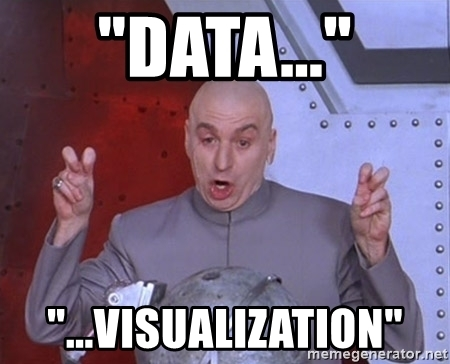

In [10]:
from IPython.display import Image
Image(next(memes)) 